## SIR Example

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (19, 5)

Populating the interactive namespace from numpy and matplotlib


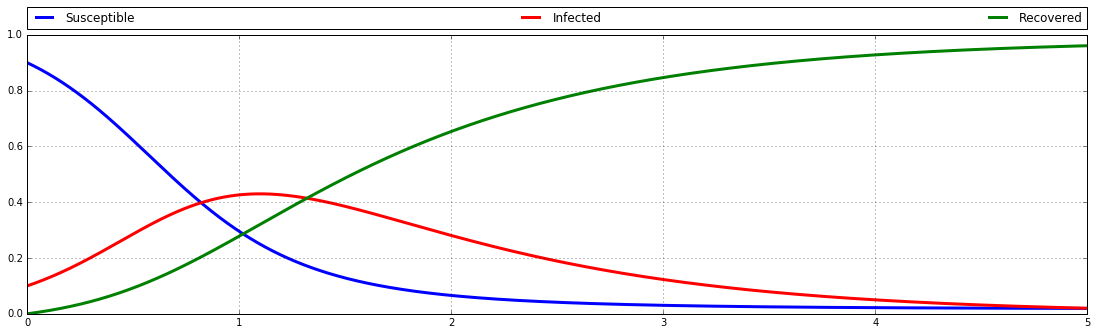

In [2]:
from SIR import *
sir = SIR(tstart=0.00, tend=5, dt=.001, beta=4, gamma=1, N=1)
sir.Initialize(S0=0.9, I0=0.1, R0=0);
sir.Simulate();
sir.PlotSIR(1)

## Prepare data

In [3]:
import random as rn
eps = 0.05

data  = np.transpose(np.array([sir._Time, 
                               sir._SS + eps*np.random.randn(sir._SS.shape[0]), 
                               sir._II + eps*np.random.randn(sir._SS.shape[0]), 
                               sir._RR + eps*np.random.randn(sir._SS.shape[0])])) 
ddata = np.transpose(np.array([sir._Time, 
                               sir._dSS + eps*np.random.randn(sir._SS.shape[0]), 
                               sir._dII + eps*np.random.randn(sir._SS.shape[0]), 
                               sir._dRR + eps*np.random.randn(sir._SS.shape[0])]))

## SINDy at work

Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****
**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
Iteration in progress:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
**** Identification is complete. We now use it to simulate the system. ****


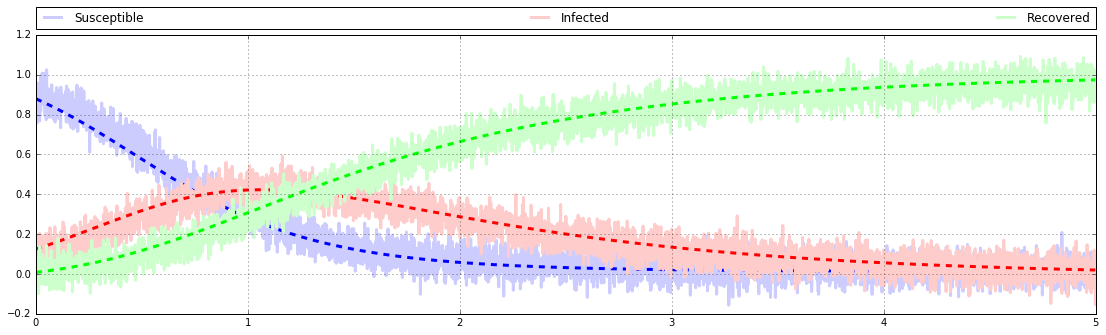

In [4]:
from SINDy import *
sin = SINDy(data=data,polyorder=2,usesine=False)
sin.SetDerivative(ddata)
sin.RunSINDy(simulate=True)
sin.SINDyPlot(statesymbols=["Susceptible","Infected","Recovered"],
              datacolors=[[0.8, 0.8, 1.0],[1.0, 0.8, 0.8],[0.8, 1.0, 0.8]],
              simcolors =[[0.0, 0.0, 1.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0]])

In [5]:
sin.StringModelView(StateVariables=["S","I","R"])

dS/dt = -0.54 + -0.25 S  + -0.25 I  +  1.05 R  +  0.61 S^2  + -1.65 I S  +  0.13 S R  +  0.46 I^2  +  0.28 I R  + -0.52 R^2 
dI/dt =  0.11 +  0.59 S  + -0.06 I  + -0.71 R  + -0.58 S^2  +  1.69 I S  + -0.69 S R  + -0.61 I^2  + -0.32 I R  +  0.59 R^2 
dR/dt =  0.48 + -0.49 S  +  0.18 I  + -0.42 R  +  0.04 S^2  +  0.15 I S  +  0.69 S R  +  0.20 I^2  +  0.14 I R  + -0.05 R^2 
